In [53]:
#Importing Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import  classification_report,ConfusionMatrixDisplay

In [54]:
#Loading dataset
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [55]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df=df.drop(columns=['name','ticket','cabin']) #Drop columns that are not useful for further analysis.


Text(0.5, 1.0, 'Bar Plot of Survival Counts')

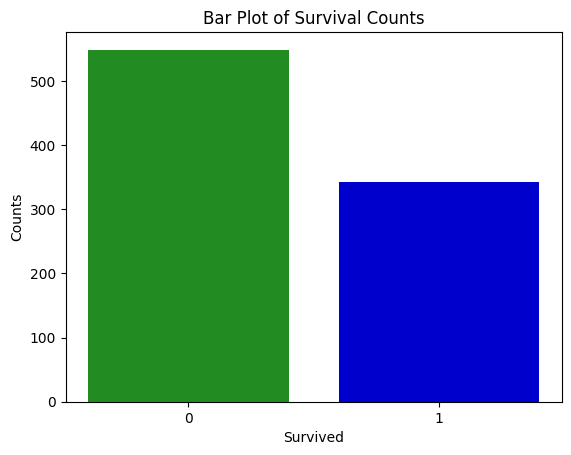

In [57]:
#Data Exploration 
# Get counts
colors = ['forestgreen', 'mediumblue']
counts = df['survived'].value_counts()
plt.bar(counts.index, counts.values, color=colors)
plt.xticks([0,1])

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Counts')
plt.title('Bar Plot of Survival Counts')

In [58]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


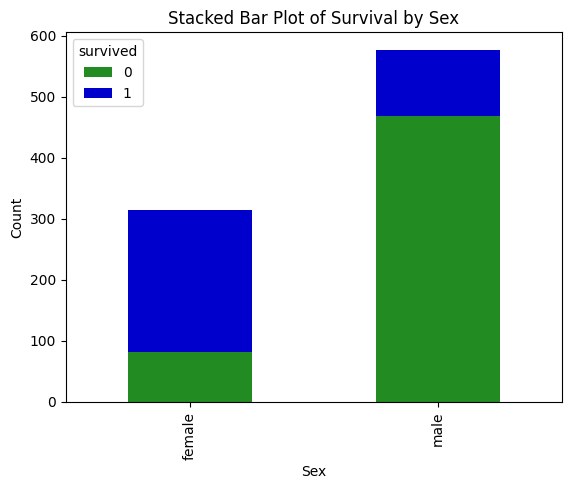

In [59]:
# Group data by 'sex' and 'survived', and count occurrences
colors = ['forestgreen', 'mediumblue']
grouped = df.groupby(['sex', 'survived']).size().unstack()
grouped.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Survival by Sex')
plt.show()

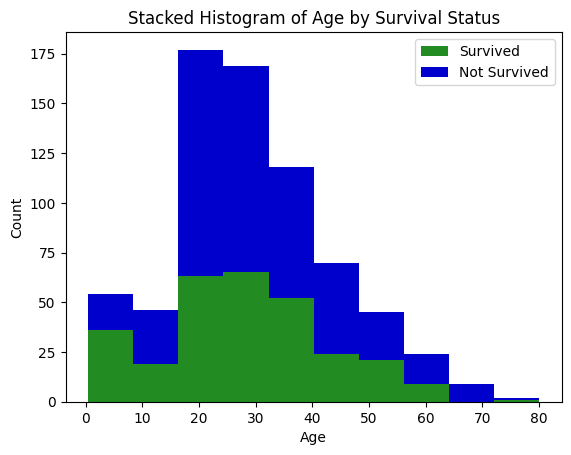

In [60]:
# Separate age data based on 'survived' category
survived_age = df[df['survived'] == 1]['age'].dropna()
not_survived_age = df[df['survived'] == 0]['age'].dropna()
# Create stacked histogram
plt.hist([survived_age, not_survived_age], bins=10, stacked=True, color=colors, label=['Survived', 'Not Survived'])
# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Stacked Histogram of Age by Survival Status')
plt.legend()
plt.show()


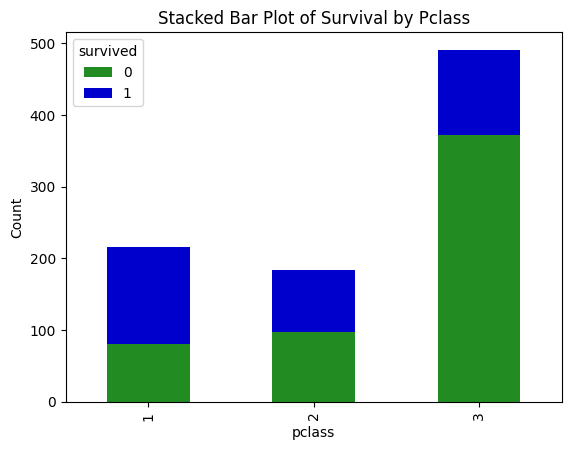

In [61]:
# Group data by 'pclass' and 'survived', and count occurrences
colors = ['forestgreen', 'mediumblue']
grouped = df.groupby(['pclass', 'survived']).size().unstack()
grouped.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('pclass')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Survival by Pclass')
plt.show()

In [62]:
#dividing data to target and predictors 
X=df.drop('survived', axis=1)
y=df.survived

In [63]:
#dividing to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=34, stratify=y)

In [64]:
# Define columns for each step in the  preprocessing pipeline
numeric_features = ['pclass','age','sibsp','parch', 'fare']
categorical_features = ['sex', 'embarked']

In [65]:
#steps for numeric transformation
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

In [66]:
#steps for categorical encoding
categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder())])


In [67]:
#combining preprocessing steps 
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [68]:
# pipline with preprocessor and KNN
pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ('classifier', KNeighborsClassifier(metric='euclidean'))
    ]
)


In [69]:
#Using GridSearchCV 
#setting parameters to try in GridSearch
neighbors = list(range(1,11))
parameters = {'classifier__n_neighbors': neighbors }

In [70]:
#Running GridSearch with pipline 
grid_search = GridSearchCV(pipe, parameters, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pclass',
                                                                          'age',
                                                                          'sibsp',
                                                                          'parch',
                                                                          'fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['sex',
                                                                          'embarked'])])),
                                       ('classifier',
                                        KNeighborsClassifier(metric='euclidean'))]),
             param_grid={'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10]})

In [71]:
#printing best accuracy and best parameter
print("Best Accuracy: {}" .format(grid_search.best_score_))
print("Best num of neighbors: {}" .format(grid_search.best_params_))

Best Accuracy: 0.8057347670250895
Best num of neighbors: {'classifier__n_neighbors': 3}


In [72]:
#predictiing on test set
y_pred=grid_search.predict(X_test)

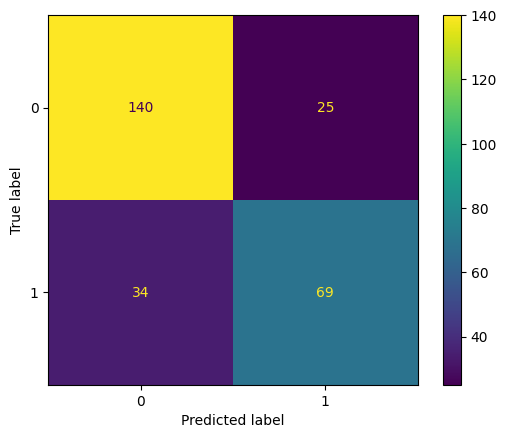

In [73]:
#displaying confusion matrix for test set 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [74]:
#classification report  test set 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       165
           1       0.73      0.67      0.70       103

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268

